<a href="https://colab.research.google.com/github/alexandrajaber/DS_Project1/blob/master/DS_Project_1_Q1_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploring the Data

To get a better understanding of the data, I will be exploring the dataset by looking at the characteristics

#### Importing the data and the relevant libraries

In [35]:
# Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

# Read the data

#df= pd.read_csv(r'C:\Users\JaberA\Desktop\winemag-data-130k-v2.csv')
df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Data Exploration and Cleansing

In [36]:
#Get a description of each column

df.describe(include='all',).T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,129971,NaN,NaN,NaN,64985,37519.5,0,32492.5,64985,97477.5,129970
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Rename 'Unnamed' column to 'Index'

df.columns = ['Index', 'Country', 'Discription','Designation','Points','Price','Province','Region','Sub-Region','Taster Name','Taster Twitter','Wine Name','Variety','Winery']


In [38]:
# Checking column has been renamed

df.columns

Index(['Index', 'Country', 'Discription', 'Designation', 'Points', 'Price',
       'Province', 'Region', 'Sub-Region', 'Taster Name', 'Taster Twitter',
       'Wine Name', 'Variety', 'Winery'],
      dtype='object')

In [39]:
# Number of rows and columns

df.shape

(129971, 14)

In [40]:
# Columns with 0 missing values

no_nulls = set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'Discription', 'Wine Name', 'Winery', 'Points', 'Index'}


In [41]:
# Columns with % of missing values

missing_cols_75 = df.isnull().mean()>0.75 #More than 75%
print(missing_cols_75)


Index             False
Country           False
Discription       False
Designation       False
Points            False
Price             False
Province          False
Region            False
Sub-Region        False
Taster Name       False
Taster Twitter    False
Wine Name         False
Variety           False
Winery            False
dtype: bool


In [42]:
# More than 50%

missing_cols_50 = df.isnull().mean()>0.50 
print(missing_cols_50)


Index             False
Country           False
Discription       False
Designation       False
Points            False
Price             False
Province          False
Region            False
Sub-Region         True
Taster Name       False
Taster Twitter    False
Wine Name         False
Variety           False
Winery            False
dtype: bool


In [43]:
# More than 25%

missing_cols_25 = df.isnull().mean()>0.25 
print(missing_cols_25)

Index             False
Country           False
Discription       False
Designation        True
Points            False
Price             False
Province          False
Region            False
Sub-Region         True
Taster Name       False
Taster Twitter    False
Wine Name         False
Variety           False
Winery            False
dtype: bool


In [44]:
# Number of NANs for each column

count_nulls=df.isnull().sum()
print(count_nulls)

Index                 0
Country              63
Discription           0
Designation       37465
Points                0
Price              8996
Province             63
Region            21247
Sub-Region        79460
Taster Name       26244
Taster Twitter    31213
Wine Name             0
Variety               1
Winery                0
dtype: int64


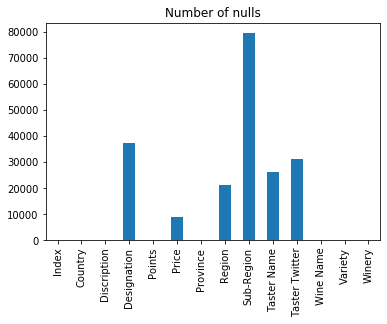

In [45]:
# Bar chart showing the number of nulls in each column

(count_nulls).plot(kind="bar");
plt.title("Number of nulls");

#### Question 1: Rating Analysis

In this section, we conduct a high level analysis to understand the average ratings by country as well as identify the top 10 and bottom 10 countries in terms of wine ratings

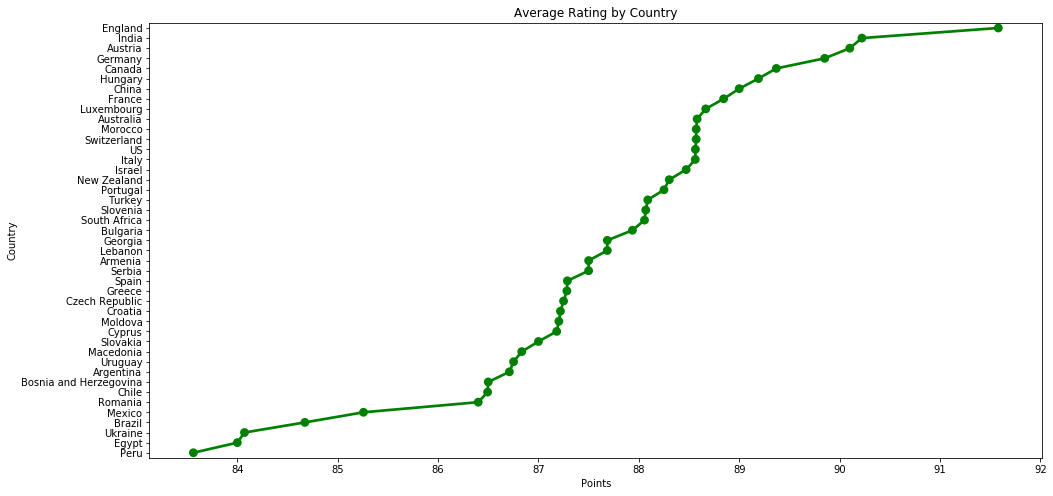

In [46]:
# Calculate and visualise average points by Country

rating_country = df.groupby(['Country',]).mean()['Points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = rating_country['Points'] ,y = rating_country.index ,color='g',orient='h')
plt.title('Average Rating by Country')
plt.xlabel('Points');

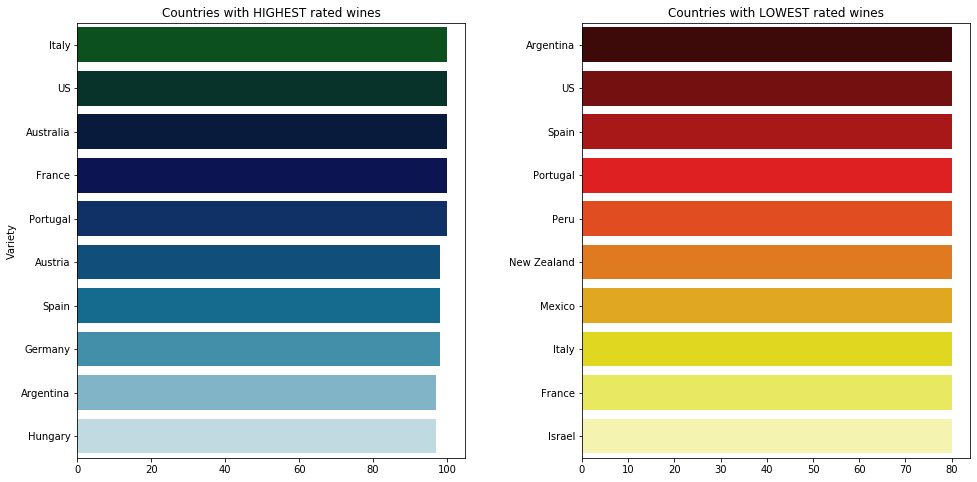

In [47]:
# Plot 2 Bar chart that show the 10 countries with the highest rated wines and the 10 countries with the lowest rated wines

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

Most_rated = df.groupby(['Country'])['Points'].max().sort_values(ascending=False).to_frame()[:10]
sns.barplot(x = Most_rated['Points'], y = Most_rated.index, palette= 'ocean',ax=ax1)
ax1.set_title('Countries with HIGHEST rated wines')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
Least_rated = df.groupby(['Country'])['Points'].min().sort_values(ascending=True).to_frame()[:10]
sns.barplot(x = Least_rated['Points'], y = Least_rated.index, palette = 'hot',ax=ax2)
ax2.set_title('Countries with LOWEST rated wines')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

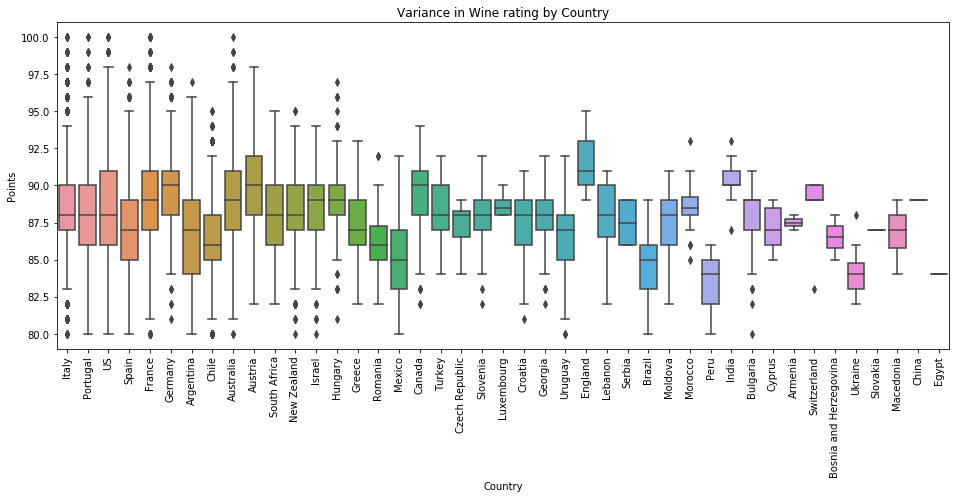

In [48]:
# Plot a boxplot to show the distribution of ratings within each country

plt.figure(figsize=(16,6))
sns.boxplot(x = df['Country'], y = df['Points'])
plt.title('Variance in Wine rating by Country')
plt.xticks(rotation=90);

#### Question 2: Pricing Analysis

In this section, we conduct a high level analysis to understand the average price by country as well as identify the top 10 and bottom 10 countries in terms of wine pricing

Text(0.5, 1.0, 'Boxplot of price')

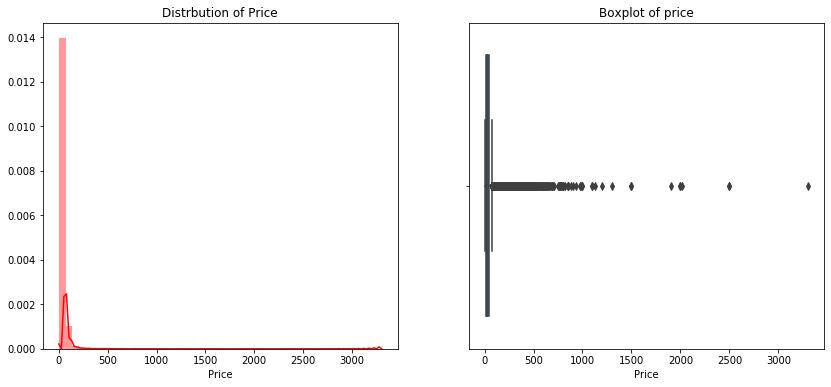

In [49]:
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(df['Price'].fillna(df['Price'].mean()),color='r',ax=ax1)
ax1.set_title('Distrbution of Price')
sns.boxplot(x = df['Price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

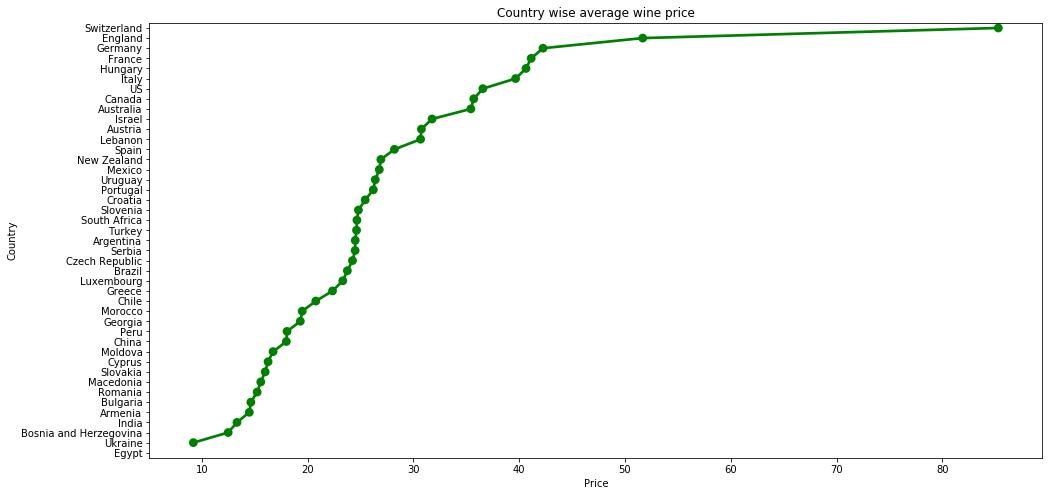

In [50]:
avg_price = df.groupby(['Country',]).mean()['Price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = avg_price['Price'] ,y = avg_price.index ,color='g',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

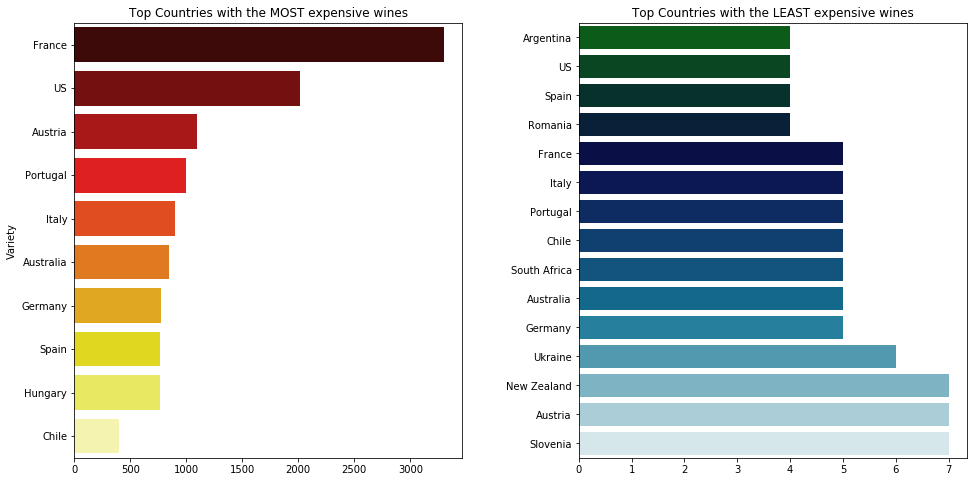

In [51]:
# Plot 2 Bar chart that show the 10 countries with the most expensive wines and the 10 countries with the least expensive wines


fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

Most_expensive = df.groupby(['Country'])['Price'].max().sort_values(ascending=False).to_frame()[:10]
sns.barplot(x = Most_expensive['Price'], y = Most_expensive.index, palette= 'hot',ax=ax1)
ax1.set_title('Top Countries with the MOST expensive wines')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
Least_expensive = df.groupby(['Country'])['Price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = Least_expensive['Price'], y = Least_expensive.index, palette = 'ocean',ax=ax2)
ax2.set_title('Top Countries with the LEAST expensive wines')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

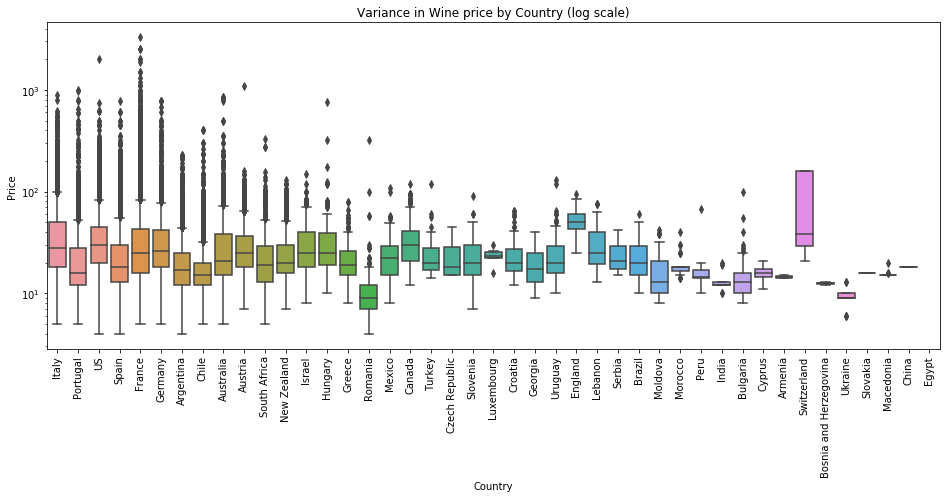

In [52]:
# Plot a boxplot to show the distribution of prices within each country

plt.figure(figsize=(16,6))
sns.boxplot(x = df['Country'], y = df['Price'])
plt.yscale("log")
plt.title('Variance in Wine price by Country (log scale)')
plt.xticks(rotation=90);

#### Question 3: Price and Rating Correlation

In this section we will explore what the correlation is between the price of wines and their ratings.

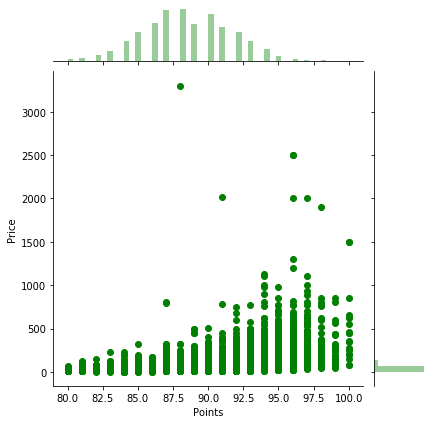

In [53]:
sns.jointplot( x = df['Points'],y = df['Price'],color='g');

#### Question 4: Price of wine determinants

In this section we will conduct a linear regression and run it's coefficients to understand which variables have the highest impact on the price of wine

In [54]:
# Uncover the types of columns

df.dtypes

Index               int64
Country            object
Discription        object
Designation        object
Points              int64
Price             float64
Province           object
Region             object
Sub-Region         object
Taster Name        object
Taster Twitter     object
Wine Name          object
Variety            object
Winery             object
dtype: object

In [55]:
# Count the number of categorical variables

categ_df = df.select_dtypes(include=['object'])
categ_df.shape[1]

11

In [56]:
# Number of columns with 0 missing values

np.sum(np.sum(categ_df.isnull())/categ_df.shape[0] == 0) 

3

In [57]:
# Names of columns with 0 missing values

categ_no_nulls = set(categ_df.columns[categ_df.isnull().mean()==0]) 
print(categ_no_nulls)

{'Discription', 'Wine Name', 'Winery'}


In [58]:
# Number of columns with more than 50% missing values

np.sum(np.sum(categ_df.isnull())/categ_df.shape[0] > 0.5) 

1

In [59]:
# Names of columns with more than 75% missing values

categ_nulls50 = set(categ_df.columns[categ_df.isnull().mean()>0.5]) 
print(categ_nulls50)

{'Sub-Region'}


In [60]:
# Number of columns with more than 75% missing values

np.sum(np.sum(categ_df.isnull())/categ_df.shape[0] > 0.75) 

0

In [61]:
df_new=df.drop(['Taster Twitter', 'Taster Name', 'Sub-Region','Index','Discription','Designation','Wine Name','Region','Winery'], axis=1)
df_new.head()
df_new.shape

(129971, 5)

In [62]:
# Columns with null values

set(df_new.columns[df_new.isnull().mean()!=0]) 


{'Country', 'Price', 'Province', 'Variety'}

In [63]:
df_new.dtypes

Country      object
Points        int64
Price       float64
Province     object
Variety      object
dtype: object

In [0]:
 # Drop rows with missing price values

df_model = df_new.dropna(subset=['Price'], axis=0)
y = df_model['Price']

#Drop Price column

df_model = df_model.drop(['Price'], axis=1)


# Dummy the categorical variables

cat_vars = df_model.select_dtypes(include=['object']).copy().columns
X = pd.get_dummies(df_model, columns = cat_vars, sparse='True')

In [65]:
y.shape

(120975,)

In [66]:
X.shape

(120975, 1162)

In [67]:
df_model.columns

Index(['Country', 'Points', 'Province', 'Variety'], dtype='object')

In [68]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [72]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.23834543061103874.  The rsquared on the test data was -4.330040118113551e+27.


In [73]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
650,Variety_Früburgunder,1.578070e+17,1.578070e+17
676,Variety_Gragnano,1.346973e+17,1.346973e+17
925,Variety_Prunelard,1.282579e+17,1.282579e+17
642,Variety_Folle Blanche,-1.037089e+17,1.037089e+17
906,Variety_Piquepoul Blanc,-1.015628e+17,1.015628e+17
517,Variety_Blauburgunder,9.797015e+16,9.797015e+16
580,Variety_Cercial,-9.514117e+16,9.514117e+16
1006,Variety_Silvaner-Traminer,9.110337e+16,9.110337e+16
106,Province_Casablanca-Curicó Valley,-8.954311e+16,8.954311e+16
940,Variety_Riesling-Chardonnay,8.855198e+16,8.855198e+16
